## House Price Project

## Imports

In [209]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Reading Data

In [210]:
df = pd.read_csv("data.csv")
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


## Filtering & Removing Nonstandard Records

In [211]:
df = df[df["Address"].notna() & df["Address"].astype(str) != ""] # Remove Records with Invalid Addresses

df["Area"] = df["Area"].astype(str).replace(r"[^\d.]", "", regex=True) # remove nonnumeric characters from Areas
df["Area"] = pd.to_numeric(df["Area"])                                 # convert String Areas to Number
df = df[(df["Area"] >= 30) & (df["Area"] <= 500)]                      # Filter Records Based on Area

# df.to_csv("cleaned_data.csv")

## Coding Data

In [ ]:
object_columns = df.select_dtypes(include=["object"]).columns.tolist() # ["Address"]

encode_cities_df = pd.get_dummies(df, columns=object_columns, prefix=object_columns)
df = encode_cities_df

for col in df.columns:
    if df[col].dtype == "bool":
        df[col] = df[col].astype(int)

df.to_csv("cleaned_data.csv")

## Reading Cleaned Data

In [220]:
df = pd.read_csv("cleaned_data.csv")
df.head()

,Unnamed: 0,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD),Address_Abazar,Address_Abbasabad,...,Address_Waterfall,Address_West Ferdows Boulevard,Address_West Pars,Address_Yaftabad,Address_Yakhchiabad,Address_Yousef Abad,Address_Zafar,Address_Zaferanieh,Address_Zargandeh,Address_Zibadasht
0,0,63,1,1,1,1,1.850000e+09,61666.67,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,60,1,1,1,1,1.850000e+09,61666.67,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,79,2,1,1,1,5.500000e+08,18333.33,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,95,2,1,1,1,9.025000e+08,30083.33,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,123,2,1,1,1,7.000000e+09,233333.33,0,0,...,0,0,0,0,0,0,0,0,0,0


## Plots

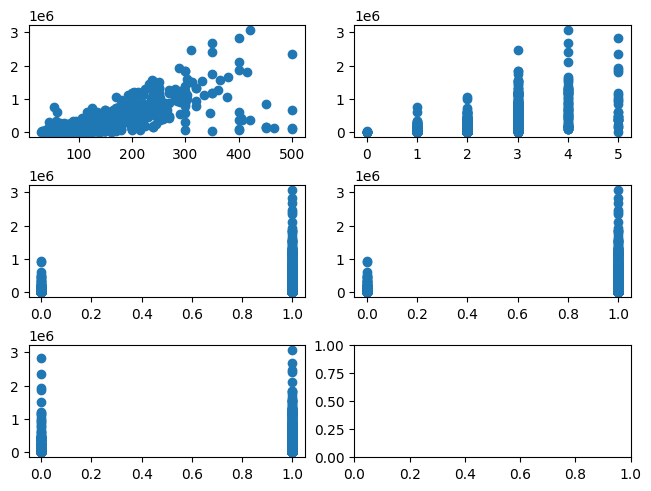

In [214]:
figure, axes = plt.subplots(3, 2, constrained_layout=True)
axes[0, 0].scatter(df["Area"], df["Price(USD)"])
axes[0, 1].scatter(df["Room"], df["Price(USD)"])
axes[1, 0].scatter(df["Parking"], df["Price(USD)"])
axes[1, 1].scatter(df["Warehouse"], df["Price(USD)"])
axes[2, 0].scatter(df["Elevator"], df["Price(USD)"])

## 